# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.simplefilter(action='ignore')
# I imported the neccessary packages

In [52]:
df = pd.read_csv("dataset.csv")
# First i read the data from the dataset

In [53]:
print(df.info())
# Here i check the dataset and i will preprocess the non numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [54]:
print ("sex : " , df["sex"].unique().T)
print ("smoker: " , df["sex"].unique().T)
print ("region : " , df["sex"].unique().T)
# I check the non-numerical data and get the unique values that i should replace

if (True in df.isna()): print("yes")
else: print("no")
# Checking if df has any NA values

sex :  ['female' 'male']
smoker:  ['female' 'male']
region :  ['female' 'male']
no


In [55]:
# Replacing the binary values
df['sex'] = df['sex'].replace({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

one_hot = pd.get_dummies(df['region'])
# Drop the region column and append the one-hot encoded columns to the DataFrame
df.drop(['region'], axis=1, inplace=True)
df = df.join(one_hot)

In [56]:
df.head()
# checking the dataset if it is proper i found out that they are all ready

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [57]:
def plotting_func(price, other, color, index, ax1):
    ax1[index].plot(df[[price]], df[[other]], "bo", color = color)
    ax1[index].set_title(price + " vs " + other)
    ax1[index].set_xlabel(price)
    ax1[index].set_ylabel(other)
    figure_title = "Figure of Data"
    fig = ax1[index].figure
    fig.suptitle(figure_title)
    return fig
# This is a plotting function to make code more readable and reduce the amount of code

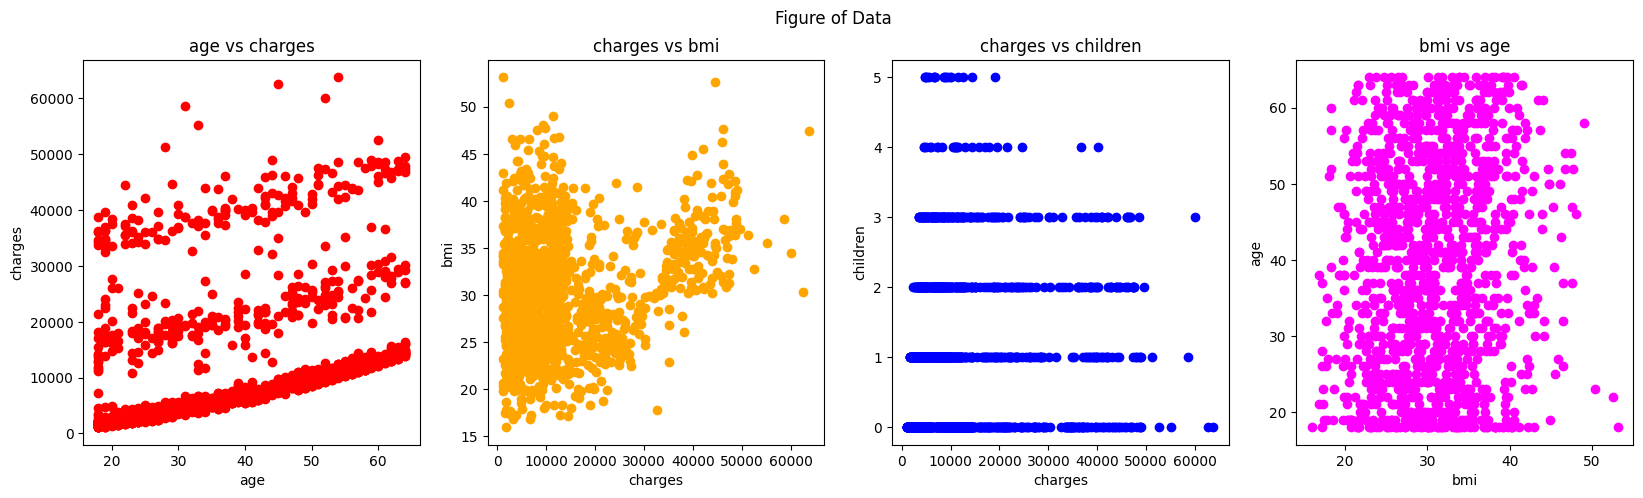

In [58]:
fig1, ax1 = plt.subplots(ncols = 4, figsize = (20,5))

plotting_func("age", "charges", "red", 0, ax1)
plotting_func("charges", "bmi", "orange", 1, ax1)
plotting_func("charges", "children", "blue", 2, ax1)
plotting_func("bmi", "age", "magenta", 3, ax1)
# Plotting the data to see some visualization
plt.show()

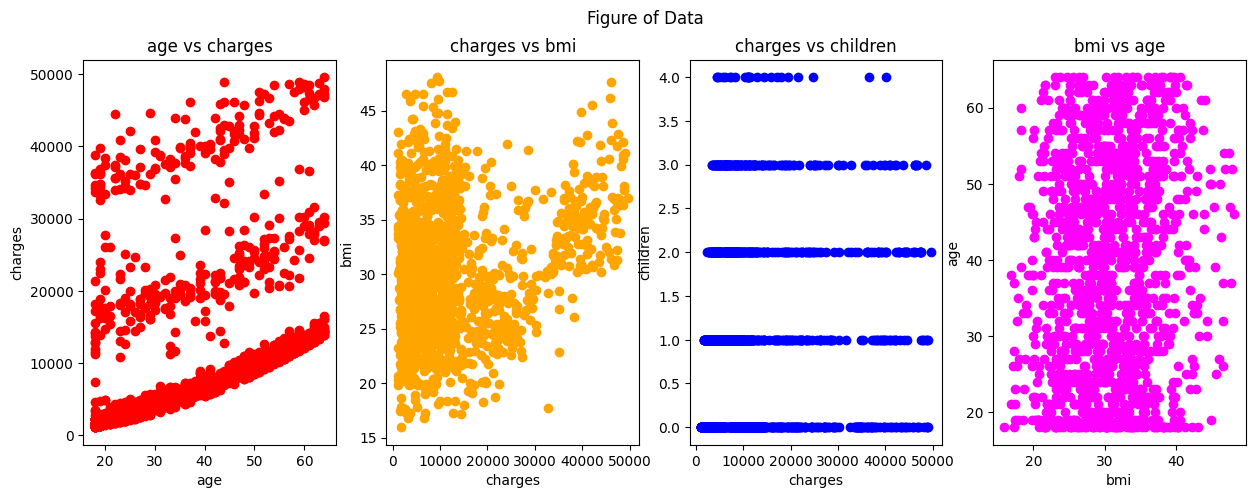

In [59]:
mean = df.mean()
std = df.std()

outliers = df[(df - mean).abs() > 3 * std]
df = df[(df - mean).abs() <= 3 * std]
# I get the outliers out with a function 
# This function will remove any rows that have values that are more than 3 standard deviations from the mean

fig1, ax1 = plt.subplots(ncols = 4, figsize = (15,5))

plotting_func("age", "charges", "red", 0, ax1)
plotting_func("charges", "bmi", "orange", 1, ax1)
plotting_func("charges", "children", "blue", 2, ax1)
plotting_func("bmi", "age", "magenta", 3, ax1)
# Plotting the data again to see the results

plt.show()

As you can see the data is more compact right now. We could choose different functions to handle the outliers but i chose this one

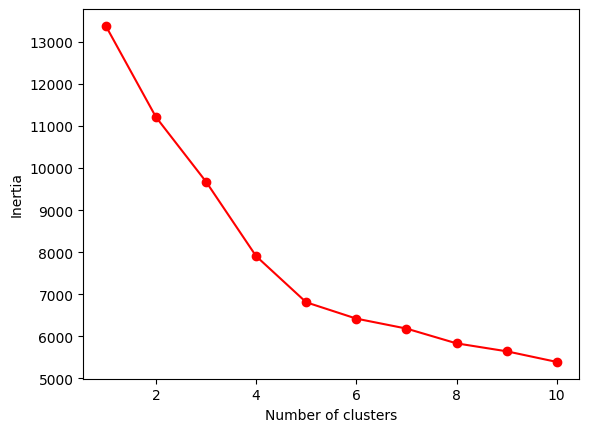

In [60]:
# Replace missing values with the mean value of the feature
df.fillna(df.mean(), inplace=True)

# Normalizing the data to fit
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# I take different clusters to find out the best possible cluster
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

# I plot the inertias in a plot to apply the elbow method
plt.plot(range(1, 11), inertias, '-ro')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Based on the elbow plot, the optimal number of cluster is 5

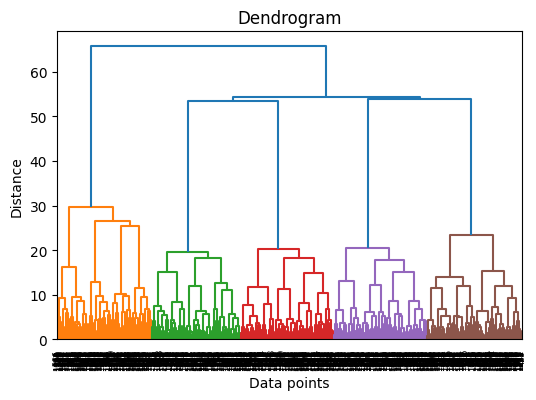

In [61]:
# Compute the dendrogram
Z = linkage(df_scaled, method='ward')

# Ploting the dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z, leaf_rotation=90, leaf_font_size=6)

plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Dendrogram')

plt.show()

# Based on the Denogram, the optimal number of cluster i choose based on the distance is 5

In [62]:
agg_cluster = 5
kmean_clusters = 5

# Perform Agglomerative Clustering with the chosen number of clusters
agg = AgglomerativeClustering(n_clusters=agg_cluster)
agg.fit(df_scaled)

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=kmean_clusters)
kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [63]:
# I get the silhouette score of those algorithms
score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette score for k-means: {score}")

score = silhouette_score(df_scaled, agg.labels_)
print(f"Silhouette score for Agglomerative Clustering: {score}")


Silhouette score for k-means: 0.304456051908419
Silhouette score for Agglomerative Clustering: 0.2959827888112977


Silhouette score of 0.5 or above is a good number. We are under that number for both algorithm. Data that is provided is not appropriate for the algorithms and it could be more effective if we extract new features.
 K-mean algorithm has shown better performance.

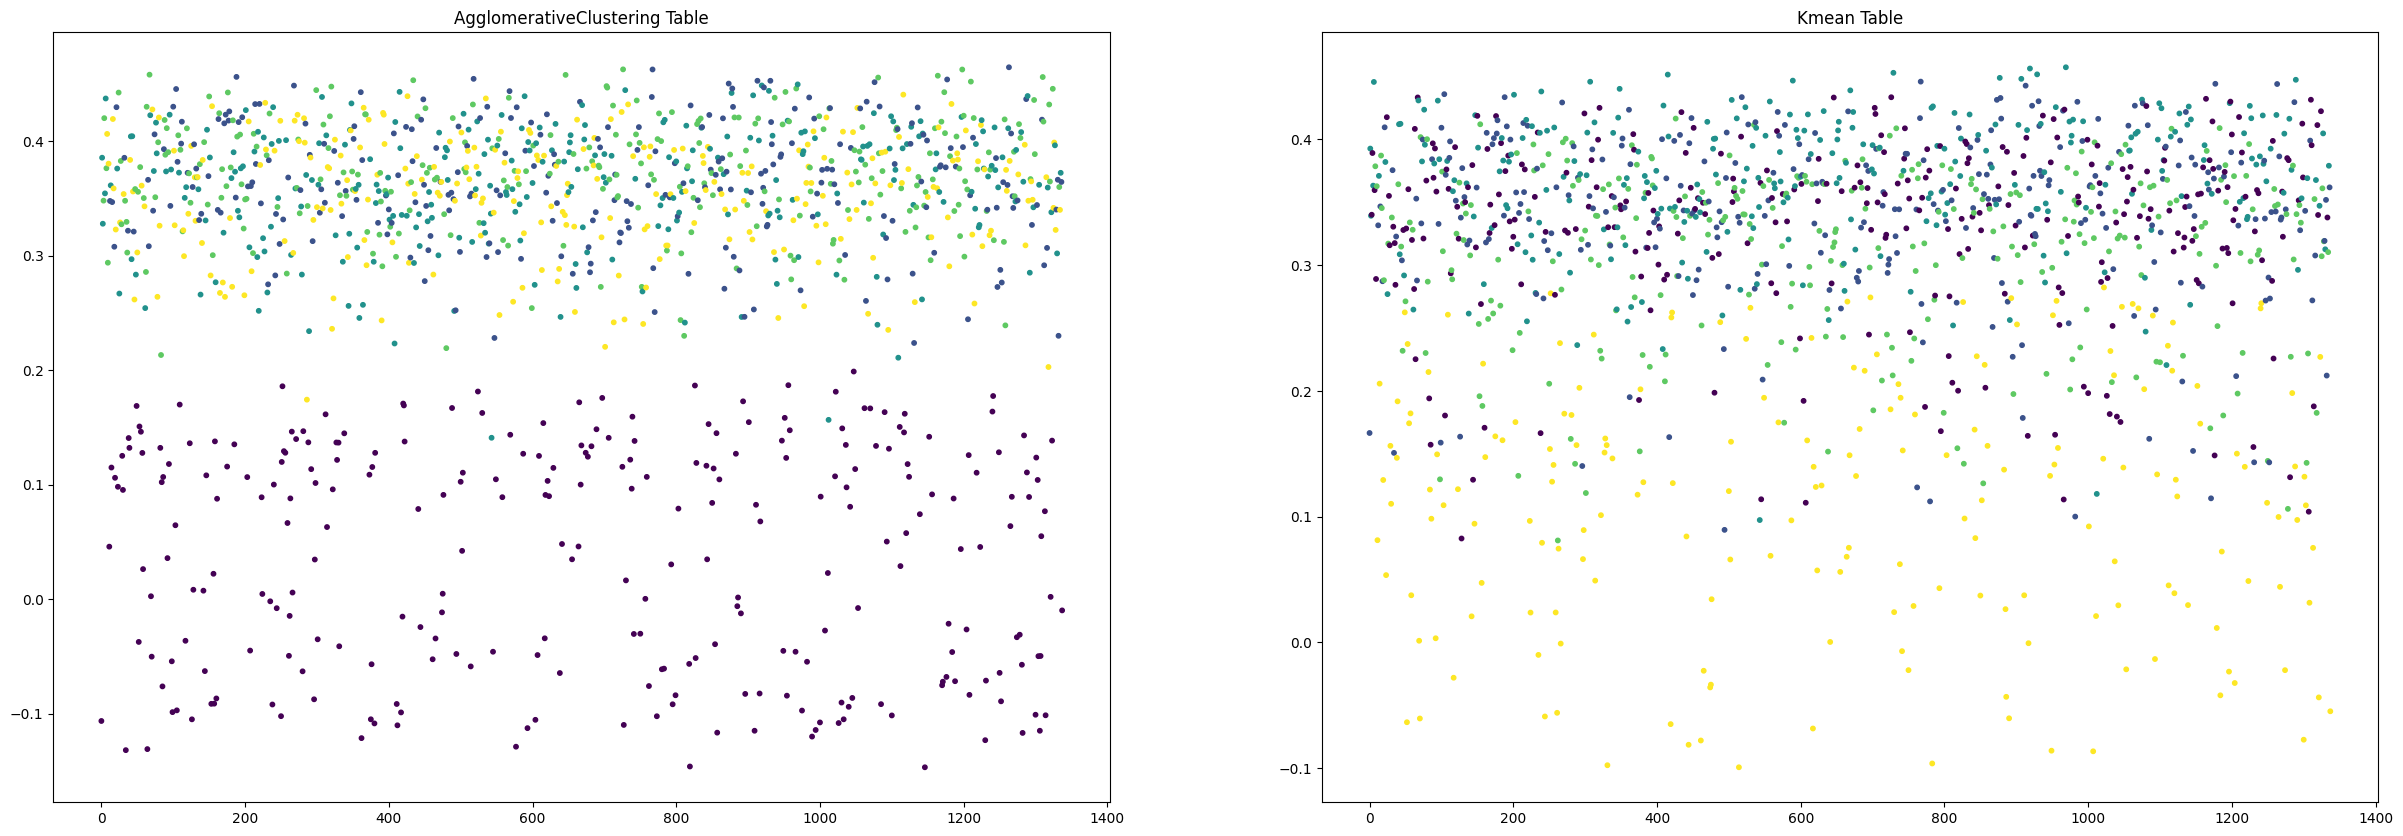

In [64]:
agg_labels = agg.fit_predict(df_scaled)
kmean_labels = kmeans.fit_predict(df_scaled)


# Calculate the silhouette scores for all data points
scoresagg = silhouette_samples(df_scaled, agg_labels, metric='euclidean')
scoreskmean = silhouette_samples(df_scaled, kmean_labels, metric='euclidean')


# Create a scatter plot of the scores
fig1, ax1 = plt.subplots(ncols = 2, figsize = (30,10))

# I have shown the sillhuette scores in the plot and the labels with colors.
ax1[0].scatter(range(len(df_scaled)), scoresagg, c=agg_labels, s= 10)
ax1[0].set_title("AgglomerativeClustering Table")
ax1[1].scatter(range(len(df_scaled)), scoreskmean, c=kmean_labels, s= 10)
ax1[1].set_title("Kmean Table")


plt.show()


I think clustering algorithms have different affects on the dataset and they are used in different datasets. K-mean algorithm has shown better results for this dataset but they are not great for this dataset
Both of them has not showed perfect scores so we can try different algorithms to predict better clusters.